In [1]:
import os
import shutil
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
# Directory for saving figures
folder_path = 'figs'
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
os.makedirs(folder_path, exist_ok=True)

def create_number_8(n_lower=10, n_upper=10):
    """Generate points in the shape of the number '8' with added noise."""
    # Generate points for the upper loop
    t_upper = np.linspace(0, 2 * np.pi, n_upper)
    x_upper = 0.6 * np.sin(t_upper) + np.random.normal(0, 0.1, size=t_upper.size)
    y_upper = 0.6 * np.cos(t_upper) + 0.8 + np.random.normal(0, 0.05, size=t_upper.size)
    
    # Generate points for the lower loop
    t_lower = np.linspace(0, 2 * np.pi, n_lower)
    x_lower = np.sin(t_lower) + np.random.normal(0, 0.05, size=t_lower.size)
    y_lower = np.cos(t_lower) - 0.8 + np.random.normal(0, 0.05, size=t_lower.size)
    
    x = np.concatenate((x_upper, x_lower))
    y = np.concatenate((y_upper, y_lower))
    
    return np.column_stack((x, y))

def plot_point_cloud_with_balls(points, epsilon):
    """Plot the point cloud with balls of radius epsilon/2."""
    plt.figure(figsize=(5, 5))
    ball_radius = epsilon / 2
    for point in points:
        circle = plt.Circle(point, ball_radius, color='red', fill=True, alpha=0.5)
        plt.gca().add_patch(circle)
    plt.scatter(points[:, 0], points[:, 1], c='black', marker='o')
    plt.axis('equal')
    plt.axis('off')
    file_name = f'figs/P8_{epsilon}'
    plt.savefig(f'{file_name}.png')  # Save as PNG
    plt.savefig(f'{file_name}.pdf')  # Save as PDF
    plt.show()

def plot_persistence_barcode(persistence, epsilon, max_dist):
    """Plot and save the persistence barcode."""
    plt.figure()
    gd.plot_persistence_barcode(persistence)
    ax = plt.gca()
    max_x = max(epsilon, max_dist / 2)
    ax.set_xlim(0, max_x)
    x_ticks = np.arange(0, max_x + 0.4, 0.4)
    ax.set_xticks(x_ticks)
    handles = [plt.Line2D([0], [0], color='red', lw=2, label='0-dim'),
               plt.Line2D([0], [0], color='dodgerblue', lw=2, label='1-dim')]
    plt.legend(handles=handles, loc='center right', frameon=False)
    file_name = f'figs/PBarcode_{np.round(epsilon, 1)}'
    plt.savefig(f'{file_name}.png', bbox_inches='tight')  # Save as PNG
    plt.savefig(f'{file_name}.svg', bbox_inches='tight')  # Save as SVG
    plt.show()



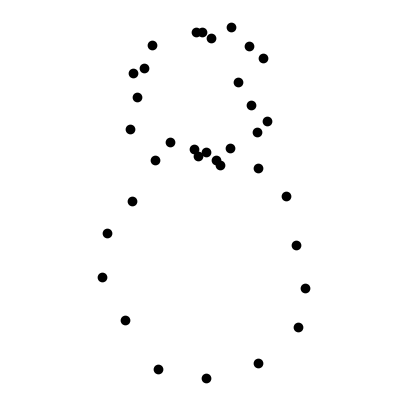

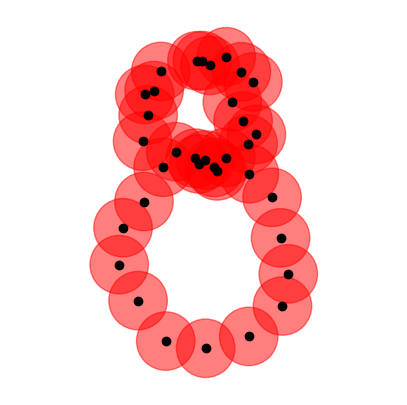

/Users/cuneytakcora/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Figure size 640x480 with 0 Axes>

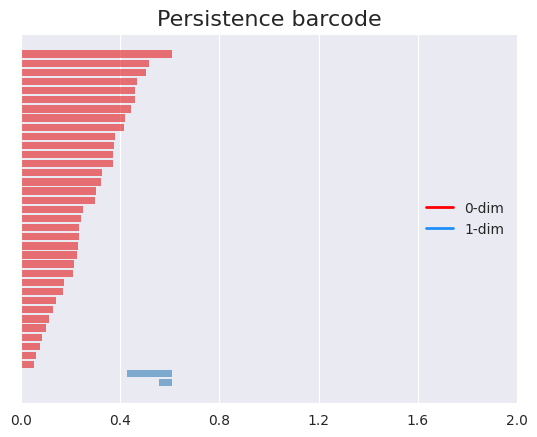

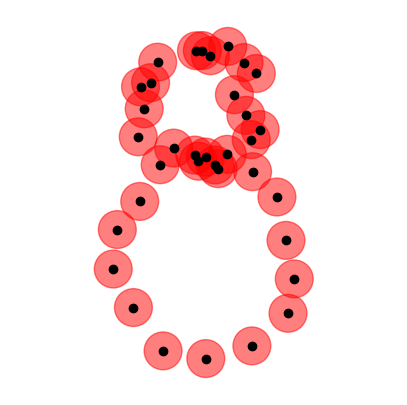

<Figure size 640x480 with 0 Axes>

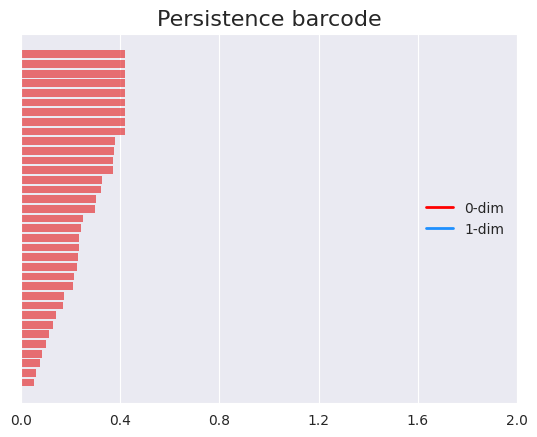

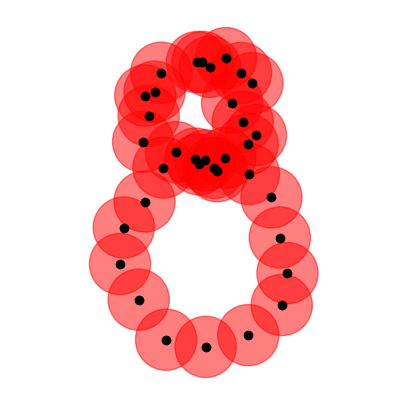

<Figure size 640x480 with 0 Axes>

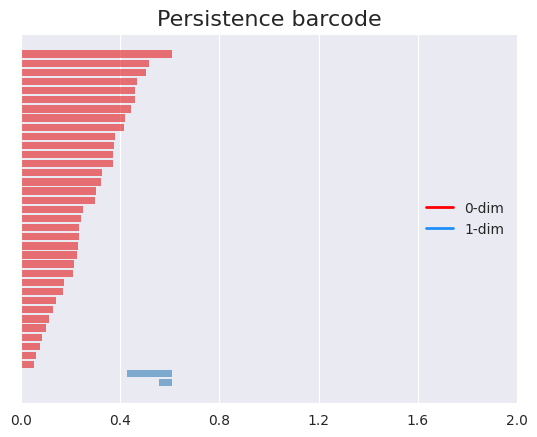

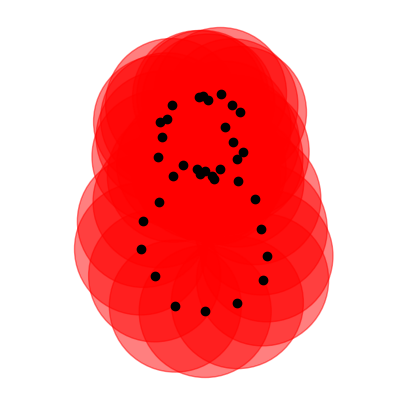

<Figure size 640x480 with 0 Axes>

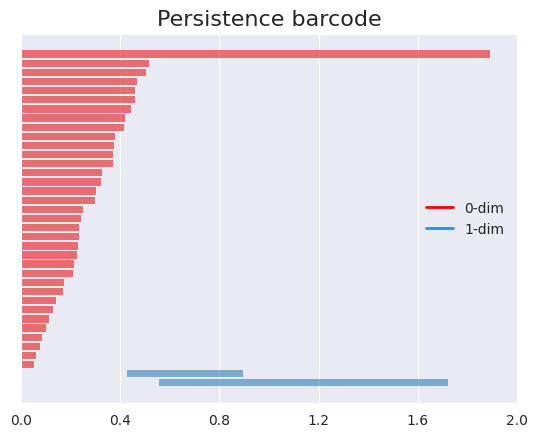

In [3]:
# Main code execution
points = create_number_8(n_lower=15, n_upper=20)
dist_matrix = distance.pdist(points)
max_dist = np.max(dist_matrix)
filtration_values = [0.2 * max_dist, 0.4, 0.7, 2]

# Plot initial point cloud
plot_point_cloud_with_balls(points, 0)

# Process each filtration value
for epsilon in filtration_values:
    plot_point_cloud_with_balls(points, epsilon)
    rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    plot_persistence_barcode(persistence, epsilon, max_dist)
